# Preprocessing Dataset - Task 2

## Imports

In [6]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from tifffile import imwrite, imread

## Preprocess dataset

In [5]:
# Defining sets that has to be rescaled
datasets = ['train', 'validation', 'task2_test']

# Define image size
original_size = 500
new_size = 512

for dataset in tqdm(datasets):
    # Make directory for preprocessed dataset
    dataset_path = os.path.normpath('dataset/MapAI/512x512_' + dataset)
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path)
        
    # Folder structure for data generator
    label = None
    if dataset == 'train':
        label = 'train'
    elif dataset == 'validation':
        label = 'val'
    else:
        label = ''

    # Make directory for preprocessed subsets
    mask_path = os.path.normpath('dataset/MapAI/512x512_' + dataset + '/mask/' + label)
    image_path = os.path.normpath('dataset/MapAI/512x512_' + dataset + '/image/' + label)
    rgblidar_path = os.path.normpath('dataset/MapAI/512x512_' + dataset + '/rgbLiDAR/' + label)
    original_mask_path = os.path.normpath('dataset/MapAI/' + dataset + '/mask')
    original_image_path = os.path.normpath('dataset/MapAI/' + dataset + '/image')
    original_lidar_path = os.path.normpath('dataset/MapAI/' + dataset + '/lidar')
    
    if not os.path.exists(mask_path):
        os.makedirs(mask_path)
    if not os.path.exists(image_path):
        os.makedirs(image_path)
    if not os.path.exists(rgblidar_path):
        os.makedirs(rgblidar_path)

    # Upscale images to 512x512
    with os.scandir(original_mask_path) as entries:
        for entry in entries:
            filename = entry.name.split(".")[0]
            
            mask_img = cv.imread(os.path.normpath(original_mask_path + '/' + entry.name), cv.IMREAD_GRAYSCALE)
            mask_img[mask_img == 255] = 1

            # Resize images
            # Mask
            resize_mask_img = cv.resize(mask_img, (new_size, new_size), interpolation = cv.INTER_AREA)
            cv.imwrite(os.path.normpath(mask_path + '/' + entry.name), resize_mask_img)

            # Image
            img = cv.imread(os.path.normpath(original_image_path + '/' + entry.name), cv.IMREAD_COLOR)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            resize_img = cv.resize(img, (new_size, new_size), interpolation = cv.INTER_AREA)
            resize_img = cv.cvtColor(resize_img, cv.COLOR_BGR2RGB)
            cv.imwrite(os.path.normpath(image_path + '/' + entry.name), resize_img)
            
            # LiDAR RGB -> Concat aerial image and lidar data
            lidar_data = np.load(os.path.normpath(original_lidar_path + '/' + filename + '.npy'))
            resize_lidar = cv.resize(lidar_data, (new_size, new_size), interpolation = cv.INTER_AREA)
            resize_lidar = np.expand_dims(resize_lidar, axis=-1)
            rgb_lidar = np.concatenate((resize_img, resize_lidar), axis=-1)
            imwrite(rgblidar_path + '/' + filename + '.tif', rgb_lidar)
            
            

 67%|███████████████████████████████████████████████████████▎                           | 2/3 [17:31<08:45, 525.52s/it]


TypeError: can only concatenate str (not "NoneType") to str

In [30]:
# Displaying images before and after resizing
def show_images(set_name, data_name):
    path_new = os.path.normpath("dataset/MapAI/512x512_" + set_name)
    
    label = None
    if dataset == 'train':
        label = 'train'
    elif dataset == 'validation':
        label = 'val'
    else:
        label = ''
    
    # Define plot
    plt.figure(figsize=(20,20))
    
    # Get rgb lidar image
    rgb_lidar = imread(os.path.normpath(path_new + "/rgbLiDAR/train/" + data_name + ".tif"))
    
    # Find and display aerial image
    plt.subplot(231)
    plt.title('Aerial Image')
    aerial_img = cv.cvtColor(rgb_lidar[:, :, 0:3].astype(np.uint8), cv.COLOR_BGR2RGB)
    plt.imshow(aerial_img)
    
    # Find and display mask image
    plt.subplot(232)
    plt.title('Mask Image')
    mask_img = cv.imread(os.path.normpath(path_new + "/mask/train/"  + data_name + ".PNG"))
    plt.imshow(mask_img * 255, cmap='gray')
    
    # Find and display edge mask image
    plt.subplot(233)
    plt.title('LiDAR Image')
    plt.imshow(rgb_lidar[:, :, 3], cmap='gray')
    print(rgb_lidar[:, :, 3])

    
    plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


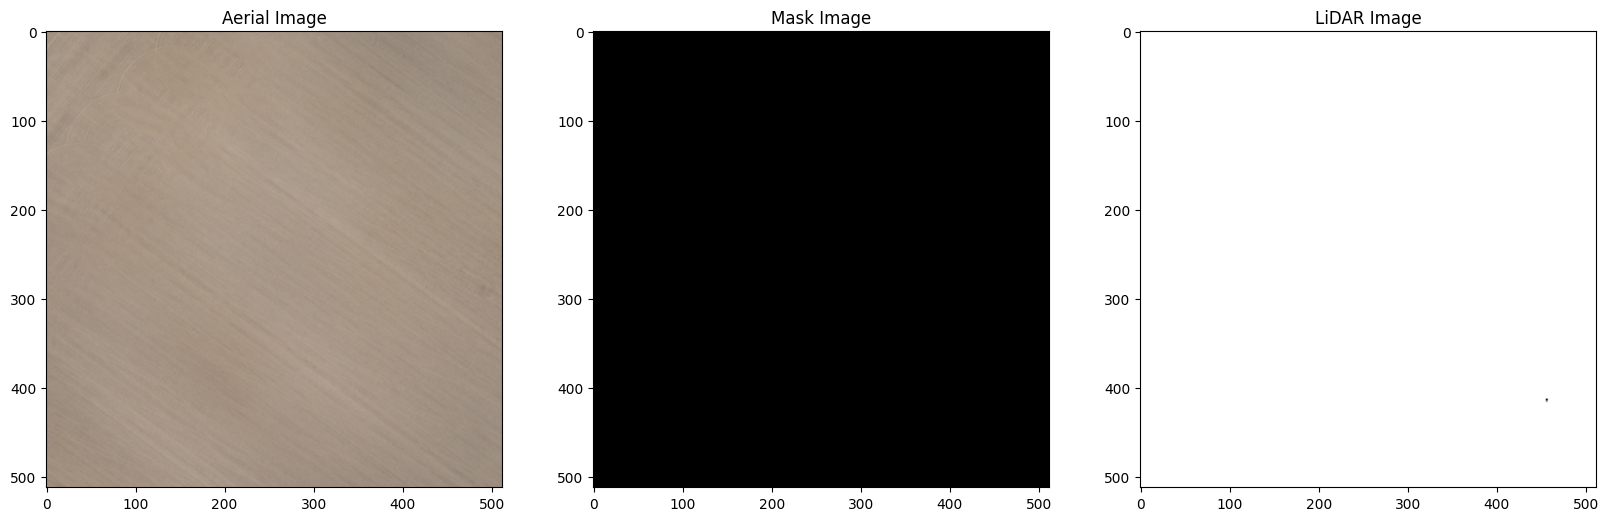

In [31]:
show_images("train", "6051_690_16")